In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Epoch 1/10


c:\Users\josev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7818 - loss: 0.6239 - val_accuracy: 0.8485 - val_loss: 0.4298
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3882 - val_accuracy: 0.8495 - val_loss: 0.3958
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 - loss: 0.3402 - val_accuracy: 0.8688 - val_loss: 0.3610
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8862 - loss: 0.3094 - val_accuracy: 0.8574 - val_loss: 0.3913
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8924 - loss: 0.2888 - val_accuracy: 0.8687 - val_loss: 0.3559
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8974 - loss: 0.2778 - val_accuracy: 0.8636 - val_loss: 0.3776
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8975 - loss: 0.2702 - val_accuracy: 0.8713 - val_loss: 0.3612
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9068 - loss: 0.2521 - val_accurac

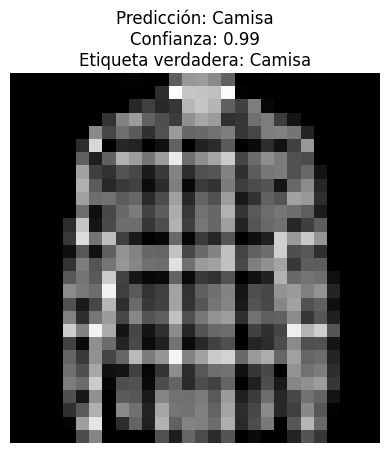

In [2]:
# Cargar el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Nombres de las clases (categorías)
categories = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
              'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')  
])

# Configuración del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluación del modelo
loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisión alcanzada en el conjunto de prueba: {accuracy:.2f}')

# Función para realizar predicciones
def classify_image(model, img):
    img = np.expand_dims(img, axis=0)  
    probabilities = model.predict(img)
    predicted_index = np.argmax(probabilities)
    confidence_level = np.max(probabilities)
    return predicted_index, confidence_level

# Selección de imagen para prueba
index = 7  # Puedes cambiar este índice para probar otras imágenes
test_image = test_images[index]
actual_label = test_labels[index]

# Predicción del modelo
predicted_label, confidence = classify_image(model, test_image)

# Visualización de la imagen con resultados
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.title(f'Predicción: {categories[predicted_label]}\n'
          f'Confianza: {confidence:.2f}\n'
          f'Etiqueta verdadera: {categories[actual_label]}')
plt.show()
